In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_excel('../data/analysis_data.xlsx')

In [9]:
df.head()

,month,price,pop,bott,bott_pc,disp_inc,exp_q,exp_val,tariff,duty_val_world,...,prop_t3,duty_r_t3,cif_r_t3,duty_val_row,q_row,cif_row,duty_row,prop_row,cif_r_row,duty_r_row
0,2000-01-31,5.299029,281083000,1.244070e+08,0.442599,9309.1,22385348,4.419970e+07,False,1.298947e+08,...,1.763354,0.071522,0.201302,7.736194e+06,2402418,550866.019417,162756.310680,0.084392,0.229296,0.067747
1,2000-02-29,5.198813,281299000,1.375283e+08,0.488904,9345.2,20954045,4.088633e+07,False,1.389756e+08,...,1.467002,0.068553,0.200174,8.226432e+06,2118152,504564.787339,163492.581602,0.083999,0.238210,0.077186
2,2000-03-31,5.311650,281531000,1.603837e+08,0.569684,9370.3,20240059,4.023967e+07,False,1.635349e+08,...,1.538206,0.069866,0.197442,9.613827e+06,2900608,710128.155340,191233.009709,0.093419,0.244820,0.065929
3,2000-04-30,5.104950,281763000,1.423004e+08,0.505036,9418.3,21745478,4.100174e+07,False,1.727178e+08,...,1.727424,0.069600,0.202943,9.347779e+06,2577645,598792.079208,177575.247525,0.074062,0.232302,0.068890
4,2000-05-31,5.426889,281996000,1.612658e+08,0.571873,9457.3,22059299,4.187646e+07,False,1.744802e+08,...,1.883923,0.065949,0.210044,9.571486e+06,2554428,626929.342493,193309.126595,0.070618,0.245428,0.075676


In [10]:
df.columns

Index(['month', 'price', 'pop', 'bott', 'bott_pc', 'disp_inc', 'exp_q',
       'exp_val', 'tariff', 'duty_val_world', 'q_world', 'cif_world',
       'duty_world', 'duty_val_bloc', 'q_bloc', 'cif_bloc', 'duty_bloc',
       'prop_bloc', 'duty_r_bloc', 'cif_r_bloc', 'duty_val_it', 'q_it',
       'cif_it', 'duty_it', 'prop_it', 'duty_r_it', 'cif_r_it', 'duty_val_au',
       'q_au', 'cif_au', 'duty_au', 'prop_au', 'duty_r_au', 'cif_r_au',
       'duty_val_cl', 'q_cl', 'cif_cl', 'duty_cl', 'prop_cl', 'duty_r_cl',
       'cif_r_cl', 'duty_val_t3', 'q_t3', 'cif_t3', 'duty_t3', 'prop_t3',
       'duty_r_t3', 'cif_r_t3', 'duty_val_row', 'q_row', 'cif_row', 'duty_row',
       'prop_row', 'cif_r_row', 'duty_r_row'],
      dtype='object')

In [5]:
# cols = ["price", "bott", "duty_bloc", "tariff", "duty_world", "duty_r_bloc", "q_bloc", "q_world", "cif_world"]
# df = df[cols]

# df.head()

,price,bott,duty_bloc,tariff,duty_world,duty_r_bloc,q_bloc,q_world,cif_world
0,5.299029,1.244070e+08,678934.951456,False,2.250568e+06,0.077427,8768676,30869692,6.853057e+06
1,5.198813,1.375283e+08,848555.885262,False,2.126339e+06,0.094685,8961916,27334547,6.089141e+06
2,5.311650,1.603837e+08,887386.407767,False,2.516082e+06,0.084715,10474993,33950034,7.495030e+06
3,5.104950,1.423004e+08,965145.544554,False,2.790541e+06,0.086731,11128077,37381318,8.363492e+06
4,5.426889,1.612658e+08,880599.607458,False,2.742312e+06,0.080982,10874051,38726698,8.921802e+06


In [11]:
def separate_endog_and_exog(df, endog, exog):
    endog_data = df[endog]
    exog_data = df[exog]
    # add intercept
    # exog_data.insert(0, 'intercept', 1)

    # convert dfs to matrices
    x = exog_data.to_numpy()
    y = endog_data.to_numpy()

    return y, x

In [12]:
endog = ['price', 'exp_q', 'q_bloc', 'q_t3', 'q_row']
exog = ['disp_inc', 'duty_r_bloc', 'tariff', 'duty_r_t3', 'duty_r_row', 'cif_world']

zt, xt = separate_endog_and_exog(df, endog, exog)

In [17]:
p=2
m=2
# calculate dimensions for exogenous variables
if xt.shape[1] < 1:
    m = -1
    k_x = 0
else:
    k_x = xt.shape[1]
# validate lags are non-negative
if p < 0:
    p = 0

In [19]:
nt = zt.shape[0]
ist = np.max([p, m])

include_mean = True
if include_mean:
    xmtx = np.ones(nt-ist)
    xmtx = xmtx.reshape((xmtx.shape[0], 1))

In [20]:
# let's define the columns so that we can keep track of which values are for which columns
cols = endog
cols_exog = exog

In [22]:
# add in the lags for endog variables
if p > 0:
    for i in range(p):
        xmtx = np.concatenate((xmtx, zt[(ist-i-1):(nt-i-1),]), axis=1)
        if i > 0:
            new_cols = [c + '_l' + str(i) for c in endog]
            # update list of column names
            cols = np.concatenate([new_cols, cols])
# add in the lags for exog variables
if m > -1:
    for i in range(m+1):
        xmtx = np.concatenate((xmtx, xt[(ist-i):(nt-i),]), axis=1)
        # update exog column names
        if i > 0:
            new_cols_exog = [c + '_l' + str(i) for c in exog]
            cols_exog = np.concatenate([new_cols_exog, cols_exog])

# update entire set of columns
cols = np.concatenate([cols, cols_exog])
cols = np.concatenate([['intercept'], cols])

In [23]:
xmtx.shape

(262, 29)

In [24]:
p1 = xmtx.shape[1]
nobe = xmtx.shape[0]

In [25]:
xpx = np.dot(xmtx.T, xmtx)

In [26]:
cols

array(['intercept', 'price_l1', 'exp_q_l1', 'q_bloc_l1', 'q_t3_l1',
       'q_row_l1', 'price', 'exp_q', 'q_bloc', 'q_t3', 'q_row',
       'disp_inc_l2', 'duty_r_bloc_l2', 'tariff_l2', 'duty_r_t3_l2',
       'duty_r_row_l2', 'cif_world_l2', 'disp_inc_l1', 'duty_r_bloc_l1',
       'tariff_l1', 'duty_r_t3_l1', 'duty_r_row_l1', 'cif_world_l1',
       'disp_inc', 'duty_r_bloc', 'tariff', 'duty_r_t3', 'duty_r_row',
       'cif_world'], dtype='<U14')

In [29]:
xpy = np.dot(xmtx.T, zt[2:zt.shape[0]])

In [30]:
zt.shape

(264, 5)

In [31]:
xpx.shape

(29, 29)

In [ ]:
# import scipy.linalg

In [34]:
xpx = xpx.astype(float)

In [35]:
xpxi = np.linalg.inv(xpx)

In [36]:
beta = np.dot(xpxi, xpy)

In [37]:
# these beta values are the coefficients of 'price', 'exp_q', 'q_bloc', 'q_t3', 'q_row' (the endogenous variables)
beta.shape

(29, 5)

In [38]:
beta

array([[0.3721749342937528, -26234893.727413177, -3837568.5479955673,
        11891572.99260521, -8684657.70075512],
       [-0.037289790421066726, 17138.43830163777, -191788.74072440714,
        450920.414710179, 56166.94273331761],
       [1.3102397522708735e-08, 0.3963009043205332,
        -0.013001773005496098, 0.0854444279052835, 0.020570292105885457],
       [-1.4635152450515087e-08, -0.12962765345889693,
        0.3988298848855436, -0.3541487075020484, -0.008493908070406064],
       [-2.392539778914884e-09, -0.0947166242446329, -0.063538562990054,
        0.3420190476250937, -0.025992605011783354],
       [-5.84650858566288e-09, -0.04116506283668997, -0.0184656005470778,
        0.24355301358018266, 0.5939657892548595],
       [0.9006206414706117, 509817.3060496822, -123541.59258065745,
        307843.7061367631, 281676.5303412415],
       [1.229895700275815e-09, 0.28683680491904795, 0.008867428218953144,
        -0.05507682361309918, -0.09042617476177739],
       [8.61373069888

In [40]:
resi = zt[2:zt.shape[0]] - np.dot(xmtx, beta)

In [41]:
resi.shape

(262, 5)

In [42]:
sig = np.matmul(resi.T, resi) / nobe

In [43]:
sig

array([[0.08952354787751733, -97475.0361431705, -45485.747153855096,
        42688.658669225704, 27041.905574322675],
       [-97475.0361431705, 15551125012641.521, 1481260871694.5989,
        540264926379.90027, 802855624622.5236],
       [-45485.747153855096, 1481260871694.5989, 2113820488734.4207,
        -390713555511.26306, 55989023220.67213],
       [42688.658669225704, 540264926379.90027, -390713555511.26306,
        12961854417268.059, 884562305059.4261],
       [27041.905574322675, 802855624622.5236, 55989023220.67213,
        884562305059.4261, 4261918942657.7246]], dtype=object)

In [44]:
co = np.kron(sig, xpxi)

In [45]:
co_diag = np.diag(co)

In [46]:
co_diag.shape

(145,)

In [47]:
se = co_diag**(1/2)

In [48]:
se.shape

(145,)

In [50]:
k = zt.shape[1]
se_beta = se.reshape((beta.shape[0], k), order='F')

In [51]:
se_beta.shape

(29, 5)

In [52]:
n_par = beta.shape[0] * k

In [53]:
sig

array([[0.08952354787751733, -97475.0361431705, -45485.747153855096,
        42688.658669225704, 27041.905574322675],
       [-97475.0361431705, 15551125012641.521, 1481260871694.5989,
        540264926379.90027, 802855624622.5236],
       [-45485.747153855096, 1481260871694.5989, 2113820488734.4207,
        -390713555511.26306, 55989023220.67213],
       [42688.658669225704, 540264926379.90027, -390713555511.26306,
        12961854417268.059, 884562305059.4261],
       [27041.905574322675, 802855624622.5236, 55989023220.67213,
        884562305059.4261, 4261918942657.7246]], dtype=object)

In [54]:
sig = sig.astype(float)
sig_det = np.linalg.det(sig)

In [55]:
d_1 = np.log(sig_det)

In [56]:
d_1

115.49572477168508

In [57]:
aic = d_1 + 2 * n_par / nobe

In [58]:
aic

116.60259500069272

In [59]:
bic = d_1 + np.log(nobe) * n_par / nobe

In [60]:
bic

118.5774421497208

In [61]:
beta = np.zeros((p1, k))

In [62]:
beta.shape

(29, 5)

In [63]:
se_beta = np.ones((p1, k))

In [64]:
se_beta.shape

(29, 5)

In [66]:
resi = zt

In [67]:
resi.shape

(264, 5)

In [68]:
n_par = 0

In [69]:
p1

29

In [73]:
fixed = np.NaN
zt = zt[2:zt.shape[0]]

if (np.isnan(fixed)):
    xpx = np.dot(xmtx.T, xmtx)
    xpx = xpx.astype(float)
    xpy = np.dot(xmtx.T, zt)
    xpxi = np.linalg.inv(xpx)
    beta = np.dot(xpxi, xpy)
    resi = zt - np.dot(xmtx, beta)
    sig = np.matmul(resi.T, resi) / nobe
    co = np.kron(sig, xpxi)
    co_diag = np.diag(co)
    se = co_diag**(1/2)
    se_beta = se.reshape((beta.shape[0], k), order='F')
    n_par = beta.shape[0] * k
    sig = sig.astype(float)
    sig_det = np.linalg.det(sig)
    d_1 = np.log(sig_det)
    aic = d_1 + 2 * n_par / nobe
    bic = d_1 + np.log(nobe) * n_par / nobe
else:
    beta = np.zeros((p1, k))
    se_beta = np.ones((p1, k))
    resi = zt
    n_par = 0
    for i in range(k):
        # id_x = range(p1)[fixed[:i] > 0]
        id_x = np.argwhere(np.any(fixed[:, i] == 1))
        n_par = n_par + len(id_x)
        if (len(id_x) > 0):
            x_m = xmtx[:, id_x]
            y_1 = zt[:, i].reshape((nobe, 1))
            xpx = np.dot(x_m.T, x_m)
            xpy = np.dot(x_m.T, y_1)
            xpx = xpx.astype(float)
            xpxi = np.linalg.solve(xpx)
            beta_1 = np.dot(xpxi, xpy)
            res = y_1 - np.dot(x_m, beta_1)
            sig_1 = np.sum(res**2) / nobe
            sig_1 = sig_1.astype(float)
            diag_sig_1 = np.diag(xpxi) * sig_1
            se = diag_sig_1**(1/2)
            beta[id_x, i] = beta_1
            se_beta[id_x, i] = se
            resi[:, i] = res
    sig = np.matmul(resi.T, resi) / nobe
    sig = sig.astype(float)
    d_1 = np.log(np.linalg.det(sig))
    aic = d_1 + 2 * n_par / nobe
    bic = d_1 + np.log(nobe) * n_par / nobe

In [74]:
fixed = np.NaN
np.isnan(fixed)

True

In [75]:
beta[0,:]

array([0.3721749342937528, -26234893.727413177, -3837568.5479955673,
       11891572.99260521, -8684657.70075512], dtype=object)

In [76]:
ph0 = np.NaN
icnt = 0

if (include_mean):
    ph0 = beta[0,:]
    icnt = icnt + 1

    print('Constant Term:')
    print('est:', [np.round(i, 4) for i in ph0])
    print('se:', [np.round(i, 4) for i in se_beta[0,:]])

Constant Term:
est: [0.3722, -26234893.7274, -3837568.548, 11891572.9926, -8684657.7008]
se: [0.8181, 10782419.701, 3975295.1404, 9843938.5933, 5644661.7061]


In [77]:
beta[(icnt):(icnt+k*p),].T

array([[-0.037289790421066726, 1.3102397522708735e-08,
        -1.4635152450515087e-08, -2.392539778914884e-09,
        -5.84650858566288e-09, 0.9006206414706117, 1.229895700275815e-09,
        8.61373069888842e-09, 1.5110658318411106e-09,
        7.99610569849505e-09],
       [17138.43830163777, 0.3963009043205332, -0.12962765345889693,
        -0.0947166242446329, -0.04116506283668997, 509817.3060496822,
        0.28683680491904795, -0.19374215927200567, 0.172712680315513,
        -0.23500531844394068],
       [-191788.74072440714, -0.013001773005496098, 0.3988298848855436,
        -0.063538562990054, -0.0184656005470778, -123541.59258065745,
        0.008867428218953144, 0.11171486351399551, 0.045634727062967784,
        0.01573204593576527],
       [450920.414710179, 0.0854444279052835, -0.3541487075020484,
        0.3420190476250937, 0.24355301358018266, 307843.7061367631,
        -0.05507682361309918, 0.2345472579297052, 0.24035871853676838,
        -0.18059846208431551],
       

In [78]:
se_beta[(icnt):(icnt+k*p),].T

array([[0.029201116296087886, 4.771797421493829e-09,
        1.2935428351476767e-08, 4.981702106021496e-09,
        9.070313881198484e-09, 0.029116451437852613,
        4.9227822505297965e-09, 1.2703396438496882e-08,
        4.867625658142621e-09, 9.434727124681584e-09],
       [384867.9243022264, 0.06289183434563035, 0.17048771043934374,
        0.065658358043435, 0.11954587080954192, 383752.0495555231,
        0.0648817999744438, 0.16742955198351764, 0.06415484135380778,
        0.1243488025600097],
       [141894.27156383658, 0.02318715189883927, 0.06285592525601134,
        0.024207122231715908, 0.04407453358899293, 141482.86748378232,
        0.02392081845172099, 0.06172843413758945, 0.023652801146513712,
        0.04584529300818599],
       [351369.7591475427, 0.05741784984143833, 0.1556487874724708,
        0.05994358062852842, 0.1091408277517218, 350351.00799622544,
        0.05923461268280985, 0.15285680525673584, 0.05857092714469645,
        0.11352572154463432],
       [2014

In [79]:
phi = np.NaN

if (p > 0):
    phi = beta[(icnt):(icnt+k*p),].T
    se_phi = se_beta[(icnt):(icnt+k*p),].T
    for i in range(1, p+1):
        print('AR(' + str(i) + ') matrix:')
        jcnt = (i-1) * k
        print('\n'.join([' '.join(['{:.3f}'.format(item) for item in row]) for row in phi[:,jcnt:(jcnt+k)]]))
        print('standard errors:')
        print('\n'.join([' '.join(['{:.3f}'.format(item) for item in row]) for row in se_phi[:,jcnt:(jcnt+k)]]))
    icnt = icnt + k * p

if (m > -1):
    print('coefficients of exogenous variables:')
    beta_exog = beta[icnt:icnt+(m+1)*k_x,:].T
    se_beta_exog = se_beta[icnt:icnt+(m+1)*k_x,:].T
    if (k_x == 1):
        beta_exog = beta_exog.T
        se_beta_exog = se_beta_exog.T
    for i in range(m):
        jdx = i * k_x
        print('l' + str(i), 'coefficient matrix')
        print('\n'.join([' '.join(['{:.3f}'.format(item) for item in row]) for row in beta_exog[:,jdx:(jdx+k_x)]]))
        print('standard errors:')
        print('\n'.join([' '.join(['{:.3f}'.format(item) for item in row]) for row in se_beta_exog[:,jdx:(jdx+k_x)]]))


AR(1) matrix:
-0.037 0.000 -0.000 -0.000 -0.000
17138.438 0.396 -0.130 -0.095 -0.041
-191788.741 -0.013 0.399 -0.064 -0.018
450920.415 0.085 -0.354 0.342 0.244
56166.943 0.021 -0.008 -0.026 0.594
standard errors:
0.029 0.000 0.000 0.000 0.000
384867.924 0.063 0.170 0.066 0.120
141894.272 0.023 0.063 0.024 0.044
351369.759 0.057 0.156 0.060 0.109
201480.678 0.033 0.089 0.034 0.063
AR(2) matrix:
0.901 0.000 0.000 0.000 0.000
509817.306 0.287 -0.194 0.173 -0.235
-123541.593 0.009 0.112 0.046 0.016
307843.706 -0.055 0.235 0.240 -0.181
281676.530 -0.090 0.110 0.045 0.205
standard errors:
0.029 0.000 0.000 0.000 0.000
383752.050 0.065 0.167 0.064 0.124
141482.867 0.024 0.062 0.024 0.046
350351.008 0.059 0.153 0.059 0.114
200896.511 0.034 0.088 0.034 0.065
coefficients of exogenous variables:
l0 coefficient matrix
0.000 -0.641 0.174 8.362 1.265 -0.000
1113.370 2284145.527 -3521008.297 -16393041.761 2684952.219 0.286
713.190 2296484.227 -2802227.945 97694509.677 -9339239.983 0.943
-146.026 -47

In [80]:
print('Residual Covariance Matrix:')
print('\n'.join([' '.join(['{:.5f}'.format(item) for item in row]) for row in sig]))
print('Information Criteria:')
print('AIC:', '{:.3f}'.format(aic))
print('BIC:', '{:.3f}'.format(bic))

Residual Covariance Matrix:
0.08952 -97475.03614 -45485.74715 42688.65867 27041.90557
-97475.03614 15551125012641.52148 1481260871694.59888 540264926379.90027 802855624622.52356
-45485.74715 1481260871694.59888 2113820488734.42065 -390713555511.26306 55989023220.67213
42688.65867 540264926379.90027 -390713555511.26306 12961854417268.05859 884562305059.42615
27041.90557 802855624622.52356 55989023220.67213 884562305059.42615 4261918942657.72461
Information Criteria:
AIC: 116.603
BIC: 118.577


In [81]:
phi

array([[-0.037289790421066726, 1.3102397522708735e-08,
        -1.4635152450515087e-08, -2.392539778914884e-09,
        -5.84650858566288e-09, 0.9006206414706117, 1.229895700275815e-09,
        8.61373069888842e-09, 1.5110658318411106e-09,
        7.99610569849505e-09],
       [17138.43830163777, 0.3963009043205332, -0.12962765345889693,
        -0.0947166242446329, -0.04116506283668997, 509817.3060496822,
        0.28683680491904795, -0.19374215927200567, 0.172712680315513,
        -0.23500531844394068],
       [-191788.74072440714, -0.013001773005496098, 0.3988298848855436,
        -0.063538562990054, -0.0184656005470778, -123541.59258065745,
        0.008867428218953144, 0.11171486351399551, 0.045634727062967784,
        0.01573204593576527],
       [450920.414710179, 0.0854444279052835, -0.3541487075020484,
        0.3420190476250937, 0.24355301358018266, 307843.7061367631,
        -0.05507682361309918, 0.2345472579297052, 0.24035871853676838,
        -0.18059846208431551],
       

In [82]:
nt

264

In [83]:
zt.shape[0]

262

In [84]:
n_t = zt.shape[0]
n_t

262

In [85]:
k = zt.shape[1]
k

5

In [86]:
dim_x = xt.shape[1]
dim_x

6

In [87]:
se = np.NaN

In [88]:
len(ph0)

5

In [90]:
ph0 = ph0.reshape((5, 1))

In [91]:
len(ph0)

5

In [92]:
zt[0:10]

array([[5.31165049e+00, 2.02400590e+07, 1.04749930e+07, 2.05744330e+07,
        2.90060800e+06],
       [5.10495050e+00, 2.17454780e+07, 1.11280770e+07, 2.36755960e+07,
        2.57764500e+06],
       [5.42688911e+00, 2.20592990e+07, 1.08740510e+07, 2.52982190e+07,
        2.55442800e+06],
       [5.18485742e+00, 2.66494410e+07, 1.20819980e+07, 2.31175660e+07,
        3.08994100e+06],
       [5.49752230e+00, 2.14527190e+07, 1.06082760e+07, 1.98399680e+07,
        2.38285100e+06],
       [5.16601562e+00, 2.50536860e+07, 1.18835050e+07, 2.50155510e+07,
        2.67922200e+06],
       [5.43177388e+00, 2.30308090e+07, 1.07217360e+07, 2.02529610e+07,
        2.69959600e+06],
       [5.22243714e+00, 3.43701930e+07, 1.62065830e+07, 2.52188260e+07,
        3.38065500e+06],
       [5.44106090e+00, 2.22669730e+07, 1.80067860e+07, 2.65209990e+07,
        3.29365900e+06],
       [5.31108930e+00, 2.22674090e+07, 1.07621160e+07, 2.11857580e+07,
        2.95549200e+06]])

In [93]:
origin = n_t

In [94]:
xt[0:(origin)].shape

(262, 6)

In [95]:
xt[-1]

array([15385.4, 0.09481411260012769, False, 0.04772618069781851,
       0.02931248946657184, 18878472.55868037], dtype=object)

In [96]:
np.diag(np.ones((1,k)))

array([1.])

In [97]:
np.ones(k)

array([1., 1., 1., 1., 1.])

In [98]:
np.zeros((k, k))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [99]:
def psi_weights(phi, lag):
        k = phi.shape[0]
        m = phi.shape[1]
        p = np.floor(m/k)
        si = np.zeros((k, k))
        np.fill_diagonal(si, 1)
        if (p < 1):
            p = 1
        if (lag < 1):
            lag = 1
        
        for i in range(1, (lag+1)):
            if (i < (p+1)):
                id_x = (i-1) * k
                t_p = phi[:, (id_x):(id_x+k)]
            else:
                t_p = np.zeros((k, k))
            jj = i-1
            jp = np.minimum(jj, p).astype(int)
            if (jp > 0):
                for j in range(1, (jp+1)):
                    jd_x = (j-1) * k
                    id_x = (i-j) * k
                    w1 = phi[:, (jd_x):(jd_x+k)]
                    w2 = si[:, (id_x):(id_x+k)]
                    t_p = t_p + np.dot(w1, w2)
            si = np.concatenate((si, t_p), axis=1)
        
        return si

In [100]:
test = psi_weights(phi, 2)

In [101]:
test

array([[1.0, 0.0, 0.0, 0.0, 0.0, -0.037289790421066726,
        1.3102397522708735e-08, -1.4635152450515087e-08,
        -2.392539778914884e-09, -5.84650858566288e-09,
        0.9036353564883596, 5.799391377662846e-09, 2.521077830682181e-09,
        6.228366435303103e-10, 3.8896702803788395e-09],
       [0.0, 1.0, 0.0, 0.0, 0.0, 17138.43830163777, 0.3963009043205332,
        -0.12962765345889693, -0.0947166242446329, -0.04116506283668997,
        495809.5450834923, 0.43686137050256435, -0.2631704990123772,
        0.11204684450252884, -0.2965447759390234],
       [0.0, 0.0, 1.0, 0.0, 0.0, -191788.74072440714,
        -0.013001773005496098, 0.3988298848855436, -0.063538562990054,
        -0.0184656005470778, -222791.7336058773, -0.009792433095109108,
        0.29793133244909, 0.0007325657994586773, -0.016419017580521805],
       [0.0, 0.0, 0.0, 1.0, 0.0, 450920.414710179, 0.0854444279052835,
        -0.3541487075020484, 0.3420190476250937, 0.24355301358018266,
        528318.0960326805,

In [102]:
test.shape

(5, 15)

In [103]:
phi

array([[-0.037289790421066726, 1.3102397522708735e-08,
        -1.4635152450515087e-08, -2.392539778914884e-09,
        -5.84650858566288e-09, 0.9006206414706117, 1.229895700275815e-09,
        8.61373069888842e-09, 1.5110658318411106e-09,
        7.99610569849505e-09],
       [17138.43830163777, 0.3963009043205332, -0.12962765345889693,
        -0.0947166242446329, -0.04116506283668997, 509817.3060496822,
        0.28683680491904795, -0.19374215927200567, 0.172712680315513,
        -0.23500531844394068],
       [-191788.74072440714, -0.013001773005496098, 0.3988298848855436,
        -0.063538562990054, -0.0184656005470778, -123541.59258065745,
        0.008867428218953144, 0.11171486351399551, 0.045634727062967784,
        0.01573204593576527],
       [450920.414710179, 0.0854444279052835, -0.3541487075020484,
        0.3420190476250937, 0.24355301358018266, 307843.7061367631,
        -0.05507682361309918, 0.2345472579297052, 0.24035871853676838,
        -0.18059846208431551],
       

In [104]:
weights = psi_weights(phi, 2)

In [105]:
sig

array([[ 8.95235479e-02, -9.74750361e+04, -4.54857472e+04,
         4.26886587e+04,  2.70419056e+04],
       [-9.74750361e+04,  1.55511250e+13,  1.48126087e+12,
         5.40264926e+11,  8.02855625e+11],
       [-4.54857472e+04,  1.48126087e+12,  2.11382049e+12,
        -3.90713556e+11,  5.59890232e+10],
       [ 4.26886587e+04,  5.40264926e+11, -3.90713556e+11,
         1.29618544e+13,  8.84562305e+11],
       [ 2.70419056e+04,  8.02855625e+11,  5.59890232e+10,
         8.84562305e+11,  4.26191894e+12]])

In [106]:
np.diag(sig)

array([8.95235479e-02, 1.55511250e+13, 2.11382049e+12, 1.29618544e+13,
       4.26191894e+12])

In [107]:
np.diag(sig)**(1/2)

array([2.99204859e-01, 3.94349147e+06, 1.45389838e+06, 3.60025755e+06,
       2.06444156e+06])

In [108]:
se = np.diag(sig)**(1/2)

In [109]:
se.shape

(5,)

In [110]:
se = se.reshape(1, k)

In [111]:
se.shape

(1, 5)

In [112]:
se

array([[2.99204859e-01, 3.94349147e+06, 1.45389838e+06, 3.60025755e+06,
        2.06444156e+06]])

In [113]:
weights

array([[1.0, 0.0, 0.0, 0.0, 0.0, -0.037289790421066726,
        1.3102397522708735e-08, -1.4635152450515087e-08,
        -2.392539778914884e-09, -5.84650858566288e-09,
        0.9036353564883596, 5.799391377662846e-09, 2.521077830682181e-09,
        6.228366435303103e-10, 3.8896702803788395e-09],
       [0.0, 1.0, 0.0, 0.0, 0.0, 17138.43830163777, 0.3963009043205332,
        -0.12962765345889693, -0.0947166242446329, -0.04116506283668997,
        495809.5450834923, 0.43686137050256435, -0.2631704990123772,
        0.11204684450252884, -0.2965447759390234],
       [0.0, 0.0, 1.0, 0.0, 0.0, -191788.74072440714,
        -0.013001773005496098, 0.3988298848855436, -0.063538562990054,
        -0.0184656005470778, -222791.7336058773, -0.009792433095109108,
        0.29793133244909, 0.0007325657994586773, -0.016419017580521805],
       [0.0, 0.0, 0.0, 1.0, 0.0, 450920.414710179, 0.0854444279052835,
        -0.3541487075020484, 0.3420190476250937, 0.24355301358018266,
        528318.0960326805,

In [115]:
hstep = 4
si = sig

if hstep > 1:
    for i in range(2, hstep):
        id_x = (i-1) * k
        wk = weights[:, (id_x):(id_x+k)]
        si = si + np.linalg.multi_dot([wk, sig, wk.T])
        se1 = np.diag(si)**(1/2)
        se1 = se1.reshape(1, k)
        se = np.concatenate((se, se1), axis=0)


In [116]:
np.linalg.multi_dot([wk, sig, wk.T])

array([[0.07280389640275492, 43165.02785826735, -26821.26363618572,
        65208.10259287418, 47286.6451799784],
       [43165.027858267356, 3117532424028.6294, -45976190150.73587,
        676368476130.6045, -855603826556.7678],
       [-26821.26363618572, -45976190150.73585, 191384661715.0027,
        -92903025809.52106, -3319820211.6330185],
       [65208.10259287419, 676368476130.6044, -92903025809.52106,
        1838137037532.697, 360194831969.22406],
       [47286.6451799784, -855603826556.7677, -3319820211.633003,
        360194831969.22406, 1353890811041.7114]], dtype=object)

In [117]:
si

array([[0.1651412873174546, 21160.408449888942, -75589.53008828551,
        111611.51178347174, 67622.10896863604],
       [21160.408449888935, 21047740396823.027, 1566599314494.5547,
        1251366150041.9556, 120253769568.10876],
       [-75589.53008828551, 1566599314494.5547, 2715818079901.95,
        -1150065170214.5981, 802255660.5675507],
       [111611.51178347177, 1251366150041.9556, -1150065170214.5981,
        17199724596435.938, 1984908670873.2778],
       [67622.10896863604, 120253769568.10901, 802255660.5675735,
        1984908670873.2778, 7127138038486.875]], dtype=object)

In [118]:
wk = weights[:, (id_x):(id_x+k)]

In [119]:
wk

array([[0.9036353564883596, 5.799391377662846e-09, 2.521077830682181e-09,
        6.228366435303103e-10, 3.8896702803788395e-09],
       [495809.5450834923, 0.43686137050256435, -0.2631704990123772,
        0.11204684450252884, -0.2965447759390234],
       [-222791.7336058773, -0.009792433095109108, 0.29793133244909,
        0.0007325657994586773, -0.016419017580521805],
       [528318.0960326805, 0.023531158554333284, -0.04756740058366249,
        0.3643354173521691, 0.04774939885032975],
       [303204.3016721958, -0.07143066540121391, 0.10766492137812131,
        0.01944674735246091, 0.5500764071588988]], dtype=object)

In [120]:
sig

array([[ 8.95235479e-02, -9.74750361e+04, -4.54857472e+04,
         4.26886587e+04,  2.70419056e+04],
       [-9.74750361e+04,  1.55511250e+13,  1.48126087e+12,
         5.40264926e+11,  8.02855625e+11],
       [-4.54857472e+04,  1.48126087e+12,  2.11382049e+12,
        -3.90713556e+11,  5.59890232e+10],
       [ 4.26886587e+04,  5.40264926e+11, -3.90713556e+11,
         1.29618544e+13,  8.84562305e+11],
       [ 2.70419056e+04,  8.02855625e+11,  5.59890232e+10,
         8.84562305e+11,  4.26191894e+12]])

In [121]:
si = np.linalg.multi_dot([wk, sig, wk.T])

In [122]:
si

array([[0.07280389640275492, 43165.02785826735, -26821.26363618572,
        65208.10259287418, 47286.6451799784],
       [43165.027858267356, 3117532424028.6294, -45976190150.73587,
        676368476130.6045, -855603826556.7678],
       [-26821.26363618572, -45976190150.73585, 191384661715.0027,
        -92903025809.52106, -3319820211.6330185],
       [65208.10259287419, 676368476130.6044, -92903025809.52106,
        1838137037532.697, 360194831969.22406],
       [47286.6451799784, -855603826556.7677, -3319820211.633003,
        360194831969.22406, 1353890811041.7114]], dtype=object)

In [123]:
np.diag(si)**(1/2)

array([0.2698219716827281, 1765653.540202219, 437475.32697856537,
       1355779.1256442538, 1163568.1376875665], dtype=object)

In [124]:
np.dot(wk, sig)

array([[0.08034844626481503, 9298.88567829971, -27208.583724795644,
        52236.94337564327, 46361.6459216408],
       [10538.052114981034, 6177984908661.951, 7876720687.945698,
        1550033157780.7, -815327798663.8386],
       [-32954.94718896573, 297960985246.7499, 624196547102.3972,
        -136235231409.01231, -66534260675.47921],
       [64011.07359727869, 479151954484.7386, -229401448961.69818,
        4818551435808.441, 556297042818.089],
       [44914.68193899865, -528763889376.84344, 131185525759.65752,
        670928520268.6592, 2318461683634.361]], dtype=object)

In [125]:
se

array([[0.29920485938152364, 3943491.4749041265, 1453898.3763435534,
        3600257.548741209, 2064441.5570942482],
       [0.30387068123578437, 4234407.629503139, 1588846.5684851222,
        3919386.120160049, 2402758.254058274],
       [0.40637579568356996, 4587781.642234406, 1647973.9318029124,
        4147255.067684641, 2669670.024270205]], dtype=object)

In [126]:
kx = beta.shape[1]

In [127]:
kx / (1 + m)

1.6666666666666667

In [128]:
phi.shape[0]

5

In [129]:
k = phi.shape[0]

In [130]:
si = np.diag(np.ones(k))

In [131]:
si

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [132]:
wk = si

In [133]:
phi

array([[-0.037289790421066726, 1.3102397522708735e-08,
        -1.4635152450515087e-08, -2.392539778914884e-09,
        -5.84650858566288e-09, 0.9006206414706117, 1.229895700275815e-09,
        8.61373069888842e-09, 1.5110658318411106e-09,
        7.99610569849505e-09],
       [17138.43830163777, 0.3963009043205332, -0.12962765345889693,
        -0.0947166242446329, -0.04116506283668997, 509817.3060496822,
        0.28683680491904795, -0.19374215927200567, 0.172712680315513,
        -0.23500531844394068],
       [-191788.74072440714, -0.013001773005496098, 0.3988298848855436,
        -0.063538562990054, -0.0184656005470778, -123541.59258065745,
        0.008867428218953144, 0.11171486351399551, 0.045634727062967784,
        0.01573204593576527],
       [450920.414710179, 0.0854444279052835, -0.3541487075020484,
        0.3420190476250937, 0.24355301358018266, 307843.7061367631,
        -0.05507682361309918, 0.2345472579297052, 0.24035871853676838,
        -0.18059846208431551],
       

In [134]:
sig

array([[ 8.95235479e-02, -9.74750361e+04, -4.54857472e+04,
         4.26886587e+04,  2.70419056e+04],
       [-9.74750361e+04,  1.55511250e+13,  1.48126087e+12,
         5.40264926e+11,  8.02855625e+11],
       [-4.54857472e+04,  1.48126087e+12,  2.11382049e+12,
        -3.90713556e+11,  5.59890232e+10],
       [ 4.26886587e+04,  5.40264926e+11, -3.90713556e+11,
         1.29618544e+13,  8.84562305e+11],
       [ 2.70419056e+04,  8.02855625e+11,  5.59890232e+10,
         8.84562305e+11,  4.26191894e+12]])

In [135]:
beta.shape

(29, 5)

In [136]:
beta_exog.shape

(5, 18)

In [137]:
beta_exog

array([[2.8576244677721435e-05, -0.6409866706598848, 0.1738395105730035,
        8.362040606730261, 1.265310642397253, -2.4329952133119e-08,
        6.149748934020788e-05, 0.3359759115699106, 0.27243912501968026,
        -9.35812691281376, 2.9681928584636807, 3.130278696771287e-08,
        -2.9323567344446966e-05, 0.042148110248220405,
        -0.40202331575204653, -3.267125311264863, -5.803022243331043,
        -2.736671204564946e-09],
       [1113.370155918601, 2284145.526584983, -3521008.2969691157,
        -16393041.760801792, 2684952.218954563, 0.285891483768399,
        2023.4308305780578, -2352823.8519285023, -1182408.1358027458,
        -3484681.7247371674, -6772264.11217308, -0.27420364929190555,
        -406.6992965265381, -9728809.70672661, 7420784.908516347,
        70218641.69461823, 107354889.95973492, -0.2366690931490325],
       [713.1899291165028, 2296484.226872325, -2802227.9450511932,
        97694509.67679572, -9339239.983243227, 0.9430566464177339,
        -164.251

In [138]:
kx = np.floor(beta_exog.shape[1] / (1 + m))
kx

6.0

In [139]:
k = phi.shape[0]
k

5

In [140]:
si = np.diag(np.ones(k))

In [144]:
wk = si.reshape((1, 25))
wk.shape

(1, 25)

In [145]:
awk = wk
awk.shape

(1, 25)

In [146]:
awk

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1.]])

In [147]:
acuwk = awk
acuwk.shape

(1, 25)

In [148]:
tmp = np.zeros((k, k))
tmp.shape

(5, 5)

In [149]:
tmp = phi[:, (id_x):(id_x + k)]

In [150]:
tmp.shape

(5, 0)

In [151]:
tmp

array([], shape=(5, 0), dtype=object)

In [152]:
if (p < 1):
    p = 1
if (m < 1):
    m=1

for i in range(1, (m+1)):
    if (i < (p+1)):
        id_x = (i-1) * k
        t_p = phi[:, id_x:(id_x+k)]
    else:
        t_p = np.zeros((k, k))
    jj = i-1
    jp = np.minimum(jj, p).astype(int)
    if (jp > 0):
        for j in range(1, (jp+1)):
            jd_x = (j-1) * k
            id_x = (i-j) * k
            w1 = phi[:, jd_x:(jd_x+k)]
            w2 = si[:, id_x:(id_x+k)]
            t_p = t_p + np.dot(w1, w2)
    si = np.concatenate((si, t_p), axis=1)
    wk = np.concatenate((wk, t_p.reshape((1, t_p.size))), axis=1)
    awk = awk + t_p.reshape((1, t_p.size), order='F')
    acuwk = np.concatenate((acuwk, awk), axis=0)
    # acuwk = acuwk.T

In [153]:
acuwk = acuwk.T

In [154]:
acuwk

array([[1.0, 0.9627102095789333, 1.866345566067293],
       [0.0, 17138.43830163777, 512947.98338513006],
       [0.0, -191788.74072440714, -414580.4743302844],
       [0.0, 450920.414710179, 979238.5107428594],
       [0.0, 56166.94273331761, 359371.2444055134],
       [0.0, 1.3102397522708735e-08, 1.8901788900371583e-08],
       [1.0, 1.3963009043205332, 1.8331622748230976],
       [0.0, -0.013001773005496098, -0.022794206100605206],
       [0.0, 0.0854444279052835, 0.10897558645961679],
       [0.0, 0.020570292105885457, -0.050860373295328457],
       [0.0, -1.4635152450515087e-08, -1.2114074619832905e-08],
       [0.0, -0.12962765345889693, -0.39279815247127414],
       [1.0, 1.3988298848855436, 1.6967612173346336],
       [0.0, -0.3541487075020484, -0.4017161080857109],
       [0.0, -0.008493908070406064, 0.09917101330771524],
       [0.0, -2.392539778914884e-09, -1.7697031353845739e-09],
       [0.0, -0.0947166242446329, 0.017330220257895948],
       [0.0, -0.063538562990054, -0.

In [155]:
# if (p < 1):
#     p = 1
# if (m < 1):
#     m = 1
# for i in range(1, (m+1)):
#     if (i < (p+1)):
#         id_x = (i-1) * k
#         tmp = phi[:, id_x:(id_x+k)]
#     else:
#         tmp = np.zeros((k, k))
#     j = i-1
#     jj = np.min([j, p])
#     if (jj > 0):
#         for j in range(1, (jj+1)):
#             jd_x = (j-1) * k
#             id_x = (i-j) * k
#             w1 = phi[:, jd_x:(jd_x+k)]
#             print(w1.shape)
#             w2 = si[:, id_x:(jd_x+k)]
#             print(w2.shape)
#             print(tmp.shape)
#             tmp = tmp + np.dot(w1, w2)
    
#     si = np.concatenate((si, tmp), axis=1)
#     wk = np.concatenate((wk, tmp.reshape((1, tmp.size))), axis=1)
#     awk = awk + tmp.reshape((1, tmp.size))
#     acuwk = np.concatenate((acuwk, awk), axis=1)

In [156]:
si

array([[1.0, 0.0, 0.0, 0.0, 0.0, -0.037289790421066726,
        1.3102397522708735e-08, -1.4635152450515087e-08,
        -2.392539778914884e-09, -5.84650858566288e-09,
        0.9036353564883596, 5.799391377662846e-09, 2.521077830682181e-09,
        6.228366435303103e-10, 3.8896702803788395e-09],
       [0.0, 1.0, 0.0, 0.0, 0.0, 17138.43830163777, 0.3963009043205332,
        -0.12962765345889693, -0.0947166242446329, -0.04116506283668997,
        495809.5450834923, 0.43686137050256435, -0.2631704990123772,
        0.11204684450252884, -0.2965447759390234],
       [0.0, 0.0, 1.0, 0.0, 0.0, -191788.74072440714,
        -0.013001773005496098, 0.3988298848855436, -0.063538562990054,
        -0.0184656005470778, -222791.7336058773, -0.009792433095109108,
        0.29793133244909, 0.0007325657994586773, -0.016419017580521805],
       [0.0, 0.0, 0.0, 1.0, 0.0, 450920.414710179, 0.0854444279052835,
        -0.3541487075020484, 0.3420190476250937, 0.24355301358018266,
        528318.0960326805,

In [157]:
si.shape

(5, 15)

In [158]:
awk

array([[1.866345566067293, 512947.98338513006, -414580.4743302844,
        979238.5107428594, 359371.2444055134, 1.8901788900371583e-08,
        1.8331622748230976, -0.022794206100605206, 0.10897558645961679,
        -0.050860373295328457, -1.2114074619832905e-08,
        -0.39279815247127414, 1.6967612173346336, -0.4017161080857109,
        0.09917101330771524, -1.7697031353845739e-09,
        0.017330220257895948, -0.06280599719059532, 1.7063544649772628,
        -0.0065458576593224425, -1.956838305284041e-09,
        -0.33770983877571337, -0.034884618127599604, 0.2913024124305124,
        2.1440421964137584]], dtype=object)

In [159]:
acuwk

array([[1.0, 0.9627102095789333, 1.866345566067293],
       [0.0, 17138.43830163777, 512947.98338513006],
       [0.0, -191788.74072440714, -414580.4743302844],
       [0.0, 450920.414710179, 979238.5107428594],
       [0.0, 56166.94273331761, 359371.2444055134],
       [0.0, 1.3102397522708735e-08, 1.8901788900371583e-08],
       [1.0, 1.3963009043205332, 1.8331622748230976],
       [0.0, -0.013001773005496098, -0.022794206100605206],
       [0.0, 0.0854444279052835, 0.10897558645961679],
       [0.0, 0.020570292105885457, -0.050860373295328457],
       [0.0, -1.4635152450515087e-08, -1.2114074619832905e-08],
       [0.0, -0.12962765345889693, -0.39279815247127414],
       [1.0, 1.3988298848855436, 1.6967612173346336],
       [0.0, -0.3541487075020484, -0.4017161080857109],
       [0.0, -0.008493908070406064, 0.09917101330771524],
       [0.0, -2.392539778914884e-09, -1.7697031353845739e-09],
       [0.0, -0.0947166242446329, 0.017330220257895948],
       [0.0, -0.063538562990054, -0.

In [160]:
orthog = True

In [161]:
orsi = np.NaN
wk1 = np.NaN
awk1 = np.NaN
acuwk = np.NaN

if (orthog):
    m1 = np.linalg.cholesky(sig)
    p1 = m1
    if (~np.isnan(wk1)):
        wk1 = np.concatenate((wk1, p1), axis=1)
    else:
        wk1 = p1.reshape((p1.size, 1), order='F')
    awk1 = wk1
    acuwk1 = awk1
    if (~np.isnan(orsi)):
        orsi = np.concatenate((orsi, p1), axis=1)
    else:
        orsi = p1
    for i in range(1, p+1):
        id_x = i*k
        w1 = si[:, id_x:(id_x+k)]
        w2 = np.dot(w1, p1)
        orsi = np.concatenate((orsi, w2), axis=1)
        wk1 = np.concatenate((wk1, w2.reshape((w2.size, 1), order='F')), axis=1)
        awk1 = awk1 + w2.reshape((w2.size, 1), order='F')
        acuwk1 = np.concatenate((acuwk1, awk1), axis=1)


In [162]:
awk1

array([[0.5536740922971979],
       [-412066.9435947933],
       [-386677.37935952493],
       [588340.1085452173],
       [301861.7104662449],
       [0.06919236263338138],
       [6992316.764571664],
       [511797.61997076316],
       [598375.3502753126],
       [289335.73110356886],
       [-0.016405118256954364],
       [-553087.4063257647],
       [2393436.824868982],
       [-1079992.823007736],
       [129372.55370007387],
       [-0.006796410745504133],
       [-16988.273382095038],
       [-233110.55784905324],
       [6179622.063166929],
       [478474.56554198946],
       [-0.0039883364703853265],
       [-688304.42595083],
       [-71100.19992866772],
       [593718.9763050966],
       [4369886.700864039]], dtype=object)

In [164]:
# w2.reshape((1, 9))
acuwk1.reshape((25,3), order='F')

array([[0.29920485938152364, 0.2851341814451462, 0.5536740922971979],
       [-325780.2575287643, -447287.1339913126, -412066.9435947933],
       [-152022.08696702708, -276535.62812899414, -386677.37935952493],
       [142673.6810273269, 374402.82915211574, 588340.1085452173],
       [90379.23257737221, 151748.23292500345, 301861.7104662449],
       [0.0, 0.044565492913636616, 0.06919236263338138],
       [3930011.7348992755, 5417395.525432368, 6992316.764571664],
       [364308.09209507756, 445111.0564577625, 511797.61997076316],
       [149298.58598567205, 458719.6613147571, 598375.3502753126],
       [211780.383986096, 411437.1176576266, 289335.73110356886],
       [0.0, -0.019723710862231528, -0.016405118256954364],
       [0.0, -152506.47378012046, -553087.4063257647],
       [1399281.7399804282, 1976681.501881285, 2393436.824868982],
       [-302594.3065512141, -902933.4447675683, -1079992.823007736],
       [-5306.039981397047, -12477.802381756788, 129372.55370007387],
       [0

In [165]:
m1

array([[ 2.99204859e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-3.25780258e+05,  3.93001173e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.52022087e+05,  3.64308092e+05,  1.39928174e+06,
         0.00000000e+00,  0.00000000e+00],
       [ 1.42673681e+05,  1.49298586e+05, -3.02594307e+05,
         3.58157022e+06,  0.00000000e+00],
       [ 9.03792326e+04,  2.11780384e+05, -5.30603998e+03,
         2.34099411e+05,  2.03815331e+06]])

In [166]:
wk1

array([[0.29920485938152364, -0.014070677936377472, 0.26853991085205176],
       [-325780.2575287643, -121506.87646254824, 35220.190396519276],
       [-152022.08696702708, -124513.54116196706, -110141.75123053082],
       [142673.6810273269, 231729.14812478886, 213937.2793931016],
       [90379.23257737221, 61369.00034763124, 150113.47754124145],
       [0.0, 0.044565492913636616, 0.02462686971974476],
       [3930011.7348992755, 1487383.790533092, 1574921.239139296],
       [364308.09209507756, 80802.9643626849, 66686.56351300068],
       [149298.58598567205, 309421.075329085, 139655.68896055553],
       [211780.383986096, 199656.73367153056, -122101.38655405771],
       [0.0, -0.019723710862231528, 0.003318592605277164],
       [0.0, -152506.47378012046, -400580.9325456443],
       [1399281.7399804282, 577399.7619008567, 416755.3229876972],
       [-302594.3065512141, -600339.1382163542, -177059.37824016757],
       [-5306.039981397047, -7171.762400359741, 141850.35608183066],
     

In [167]:
p

2

In [168]:
td_x = np.array(range(p+1))

In [169]:
td_x

array([0, 1, 2])

In [170]:
import matplotlib.pyplot as plt

In [171]:
wk1

array([[0.29920485938152364, -0.014070677936377472, 0.26853991085205176],
       [-325780.2575287643, -121506.87646254824, 35220.190396519276],
       [-152022.08696702708, -124513.54116196706, -110141.75123053082],
       [142673.6810273269, 231729.14812478886, 213937.2793931016],
       [90379.23257737221, 61369.00034763124, 150113.47754124145],
       [0.0, 0.044565492913636616, 0.02462686971974476],
       [3930011.7348992755, 1487383.790533092, 1574921.239139296],
       [364308.09209507756, 80802.9643626849, 66686.56351300068],
       [149298.58598567205, 309421.075329085, 139655.68896055553],
       [211780.383986096, 199656.73367153056, -122101.38655405771],
       [0.0, -0.019723710862231528, 0.003318592605277164],
       [0.0, -152506.47378012046, -400580.9325456443],
       [1399281.7399804282, 577399.7619008567, 416755.3229876972],
       [-302594.3065512141, -600339.1382163542, -177059.37824016757],
       [-5306.039981397047, -7171.762400359741, 141850.35608183066],
     

In [172]:
td_x = np.array(range(p+1))
td_x

array([0, 1, 2])

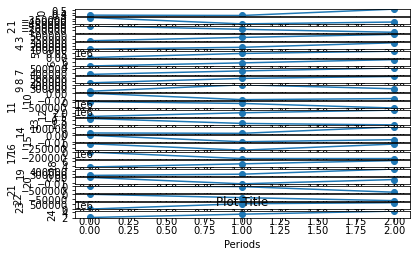

In [173]:
for i in range(wk1.shape[0]):
    plt.subplot((wk1.shape[0]+1), 1, (i+1))
    x_data = acuwk1[i]
    plt.plot(td_x, x_data, 'o-')
    plt.ylabel(str(i))
        
plt.xlabel('Periods')
plt.title('Plot Title')
plt.show()

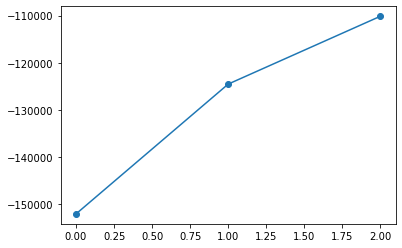

In [200]:
plt.plot(td_x, wk1[2], 'o-')

In [174]:
kx = int(np.floor(beta_exog.shape[1] / (1 + m)))
psi_x = beta_exog[:, 0:kx]

In [175]:
wk = psi_x.reshape((1, psi_x.size), order='F')

In [176]:
awk = wk
acuwk = wk

In [177]:
lag=2

In [178]:
t_p = np.zeros((k, k_x))

In [179]:
t_p

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [180]:
for i in range(1, lag+1):
    if (i < (m+1)):
        id_x = (i-1) * kx
        t_p = beta_exog[:, id_x:(id_x+kx)]
    else:
        t_p = np.zeros((k, k_x))
    jj = i-1
    jp = np.minimum(jj, p).astype(int)
    if (jp > 0):
        for j in range(1, (jp+1)):
            jd_x = (j-1) * k
            id_x = (i-j) * k
            w1 = phi[:, jd_x:(jd_x+k)]
            w2 = si[:, id_x:(id_x+kx)]
            t_p = t_p + np.dot(w1, w2)
    psi_x = np.concatenate((psi_x, t_p), axis=1)
    wk = np.concatenate((wk, t_p.reshape((1, t_p.size))), axis=1)
    awk = awk + t_p.reshape((1, t_p.size), order='F')
    acuwk = np.concatenate((acuwk, awk), axis=0)
    # acuwk = acuwk.T

In [181]:
acuwk.shape

(3, 30)

In [182]:
acuwk

array([[2.8576244677721435e-05, 1113.370155918601, 713.1899291165028,
        -146.02640580572188, -434.7043036521136, -0.6409866706598848,
        2284145.526584983, 2296484.226872325, -4722989.110820293,
        -547034.3375933766, 0.1738395105730035, -3521008.2969691157,
        -2802227.9450511932, 1936915.614026904, 5470173.166963428,
        8.362040606730261, -16393041.760801792, 97694509.67679572,
        -537504183.3777943, -16753988.945516825, 1.265310642397253,
        2684952.218954563, -9339239.983243227, 50484296.63536644,
        148381298.07852244, -2.4329952133119e-08, 0.285891483768399,
        0.9430566464177339, 1.943800752826256, 0.45422158775582844],
       [5.715248935544287e-05, 2226.740311837202, 1426.3798582330055,
        -292.05281161144376, -869.4086073042272, -1.2819733413197696,
        4568291.053169966, 4592968.45374465, -9445978.221640587,
        -1094068.6751867533, 0.347679021146007, -7042016.5939382315,
        -5604455.8901023865, 3873831.22805380

In [183]:
wk

array([[2.8576244677721435e-05, 1113.370155918601, 713.1899291165028,
        -146.02640580572188, -434.7043036521136, -0.6409866706598848,
        2284145.526584983, 2296484.226872325, -4722989.110820293,
        -547034.3375933766, 0.1738395105730035, -3521008.2969691157,
        -2802227.9450511932, 1936915.614026904, 5470173.166963428,
        8.362040606730261, -16393041.760801792, 97694509.67679572,
        -537504183.3777943, -16753988.945516825, 1.265310642397253,
        2684952.218954563, -9339239.983243227, 50484296.63536644,
        148381298.07852244, -2.4329952133119e-08, 0.285891483768399,
        0.9430566464177339, 1.943800752826256, 0.45422158775582844,
        2.8576244677721435e-05, -0.6409866706598848, 0.1738395105730035,
        8.362040606730261, 1.265310642397253, -2.4329952133119e-08,
        1113.370155918601, 2284145.526584983, -3521008.2969691157,
        -16393041.760801792, 2684952.218954563, 0.285891483768399,
        713.1899291165028, 2296484.226872325,

In [184]:
awk.shape

(1, 30)

In [185]:
acuwk

array([[2.8576244677721435e-05, 1113.370155918601, 713.1899291165028,
        -146.02640580572188, -434.7043036521136, -0.6409866706598848,
        2284145.526584983, 2296484.226872325, -4722989.110820293,
        -547034.3375933766, 0.1738395105730035, -3521008.2969691157,
        -2802227.9450511932, 1936915.614026904, 5470173.166963428,
        8.362040606730261, -16393041.760801792, 97694509.67679572,
        -537504183.3777943, -16753988.945516825, 1.265310642397253,
        2684952.218954563, -9339239.983243227, 50484296.63536644,
        148381298.07852244, -2.4329952133119e-08, 0.285891483768399,
        0.9430566464177339, 1.943800752826256, 0.45422158775582844],
       [5.715248935544287e-05, 2226.740311837202, 1426.3798582330055,
        -292.05281161144376, -869.4086073042272, -1.2819733413197696,
        4568291.053169966, 4592968.45374465, -9445978.221640587,
        -1094068.6751867533, 0.347679021146007, -7042016.5939382315,
        -5604455.8901023865, 3873831.22805380

In [186]:
# import varx

In [187]:
# var_class = varx.VARX(df, endog, exog, 2, 2, True)


In [188]:
# df